In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
df=pd.read_csv("bank-full.csv", sep=";")
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [6]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

C:\Users\sangharsh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='y', ylabel='count'>

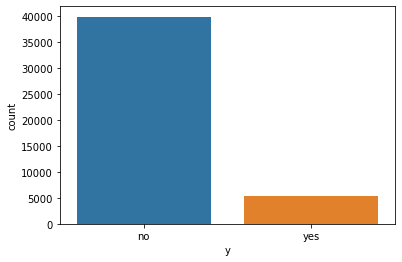

In [10]:
sns.countplot('y',data=df)

<AxesSubplot:xlabel='y', ylabel='count'>

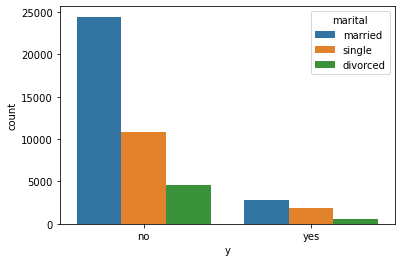

In [12]:
sns.countplot(x='y',hue='marital', data=df)

<AxesSubplot:ylabel='Frequency'>

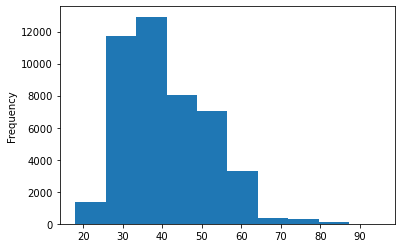

In [13]:
df['age'].plot.hist()

<AxesSubplot:xlabel='default', ylabel='count'>

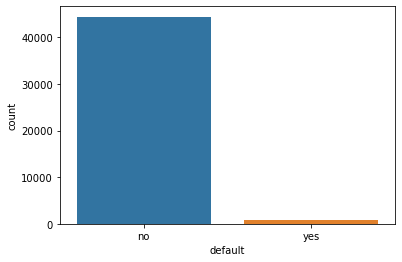

In [22]:
sns.countplot(x='default',data=df)

In [28]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [51]:
df1=df.drop(['contact','poutcome'], axis=1)

In [66]:
job=pd.get_dummies(df['job'],drop_first=True)
marital=pd.get_dummies(df['marital'],drop_first=True)
education=pd.get_dummies(df['education'])
loan=pd.get_dummies(df['loan'],drop_first=True)
month=pd.get_dummies(df['month'])
housing=pd.get_dummies(df['housing'],drop_first=True)
default=pd.get_dummies(df['default'],drop_first=True)

In [67]:
from sklearn.preprocessing import LabelEncoder

In [68]:
le=LabelEncoder()
df1['y']=le.fit_transform(df1['y'])

In [69]:
df1

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,y
0,58,management,married,tertiary,no,2143,yes,no,5,may,261,1,-1,0,0
1,44,technician,single,secondary,no,29,yes,no,5,may,151,1,-1,0,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,5,may,76,1,-1,0,0
3,47,blue-collar,married,unknown,no,1506,yes,no,5,may,92,1,-1,0,0
4,33,unknown,single,unknown,no,1,no,no,5,may,198,1,-1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,17,nov,977,3,-1,0,1
45207,71,retired,divorced,primary,no,1729,no,no,17,nov,456,2,-1,0,1
45208,72,retired,married,secondary,no,5715,no,no,17,nov,1127,5,184,3,1
45209,57,blue-collar,married,secondary,no,668,no,no,17,nov,508,4,-1,0,0


In [70]:
data=pd.concat([df1,job,marital,education,loan,month,housing,default], axis=1)

In [84]:
final=data.drop(['job','marital','education','loan','month','housing','default'], axis=1)

In [74]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [85]:
X=final.drop(['y'], axis=1).values
y=final['y'].values

In [87]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=100)

In [89]:
sc=StandardScaler()
x_train=sc.fit_transform(X_train)
x_test=sc.transform(X_test)

In [90]:
model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [94]:
y_pred=model.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [96]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [98]:
classification_report(y_test , y_pred)

'              precision    recall  f1-score   support\n\n           0       0.91      0.97      0.94      8004\n           1       0.56      0.26      0.36      1039\n\n    accuracy                           0.89      9043\n   macro avg       0.74      0.62      0.65      9043\nweighted avg       0.87      0.89      0.87      9043\n'

In [99]:
confusion_matrix(y_test,y_pred)

array([[7791,  213],
       [ 764,  275]], dtype=int64)

In [100]:
accuracy_score(y_test,y_pred)

0.8919606325334513

In [105]:
df2=pd.DataFrame({'actual':y_test,'prediction':y_pred })
df2

,actual,prediction
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
9038,1,0
9039,0,0
9040,0,0
9041,0,0
